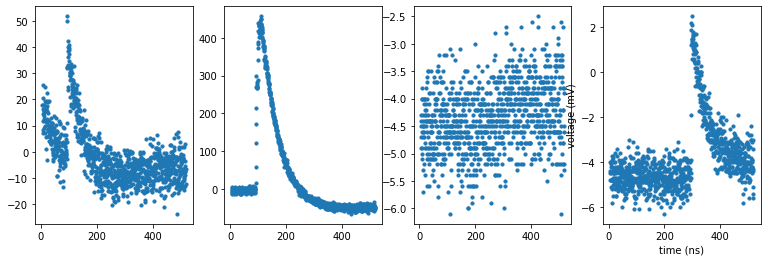

In [55]:
import matplotlib.pyplot as plt
import numpy as np

fix,ax = plt.subplots(1,4,figsize=(13,4))
with open("./TwofoldTrigger/5.txt") as f:
    events = f.read().split('-- Event')

for event in [779]:
    lines = events[event+1].split('\n')
    time = []
    voltage = []
    voltage2 = []
    voltage3 = []
    voltage4 = []
#6 - 1028
    for line in lines[6:1028]:
        
        values = line.split()
        if 1:#float(values[5]) > -10:
            time.append(float(values[2]))
            voltage.append(float(values[3]))
            voltage2.append(float(values[4]))
            voltage3.append(float(values[5]))
            voltage4.append(float(values[6]))

    ax[0].scatter(time,voltage,s=10)
    ax[1].scatter(time,voltage2,s=10)
    ax[2].scatter(time,voltage3,s=10)
    ax[3].scatter(time,voltage4,s=10)
plt.xlabel('time (ns)')
plt.ylabel('voltage (mV)')
plt.show()

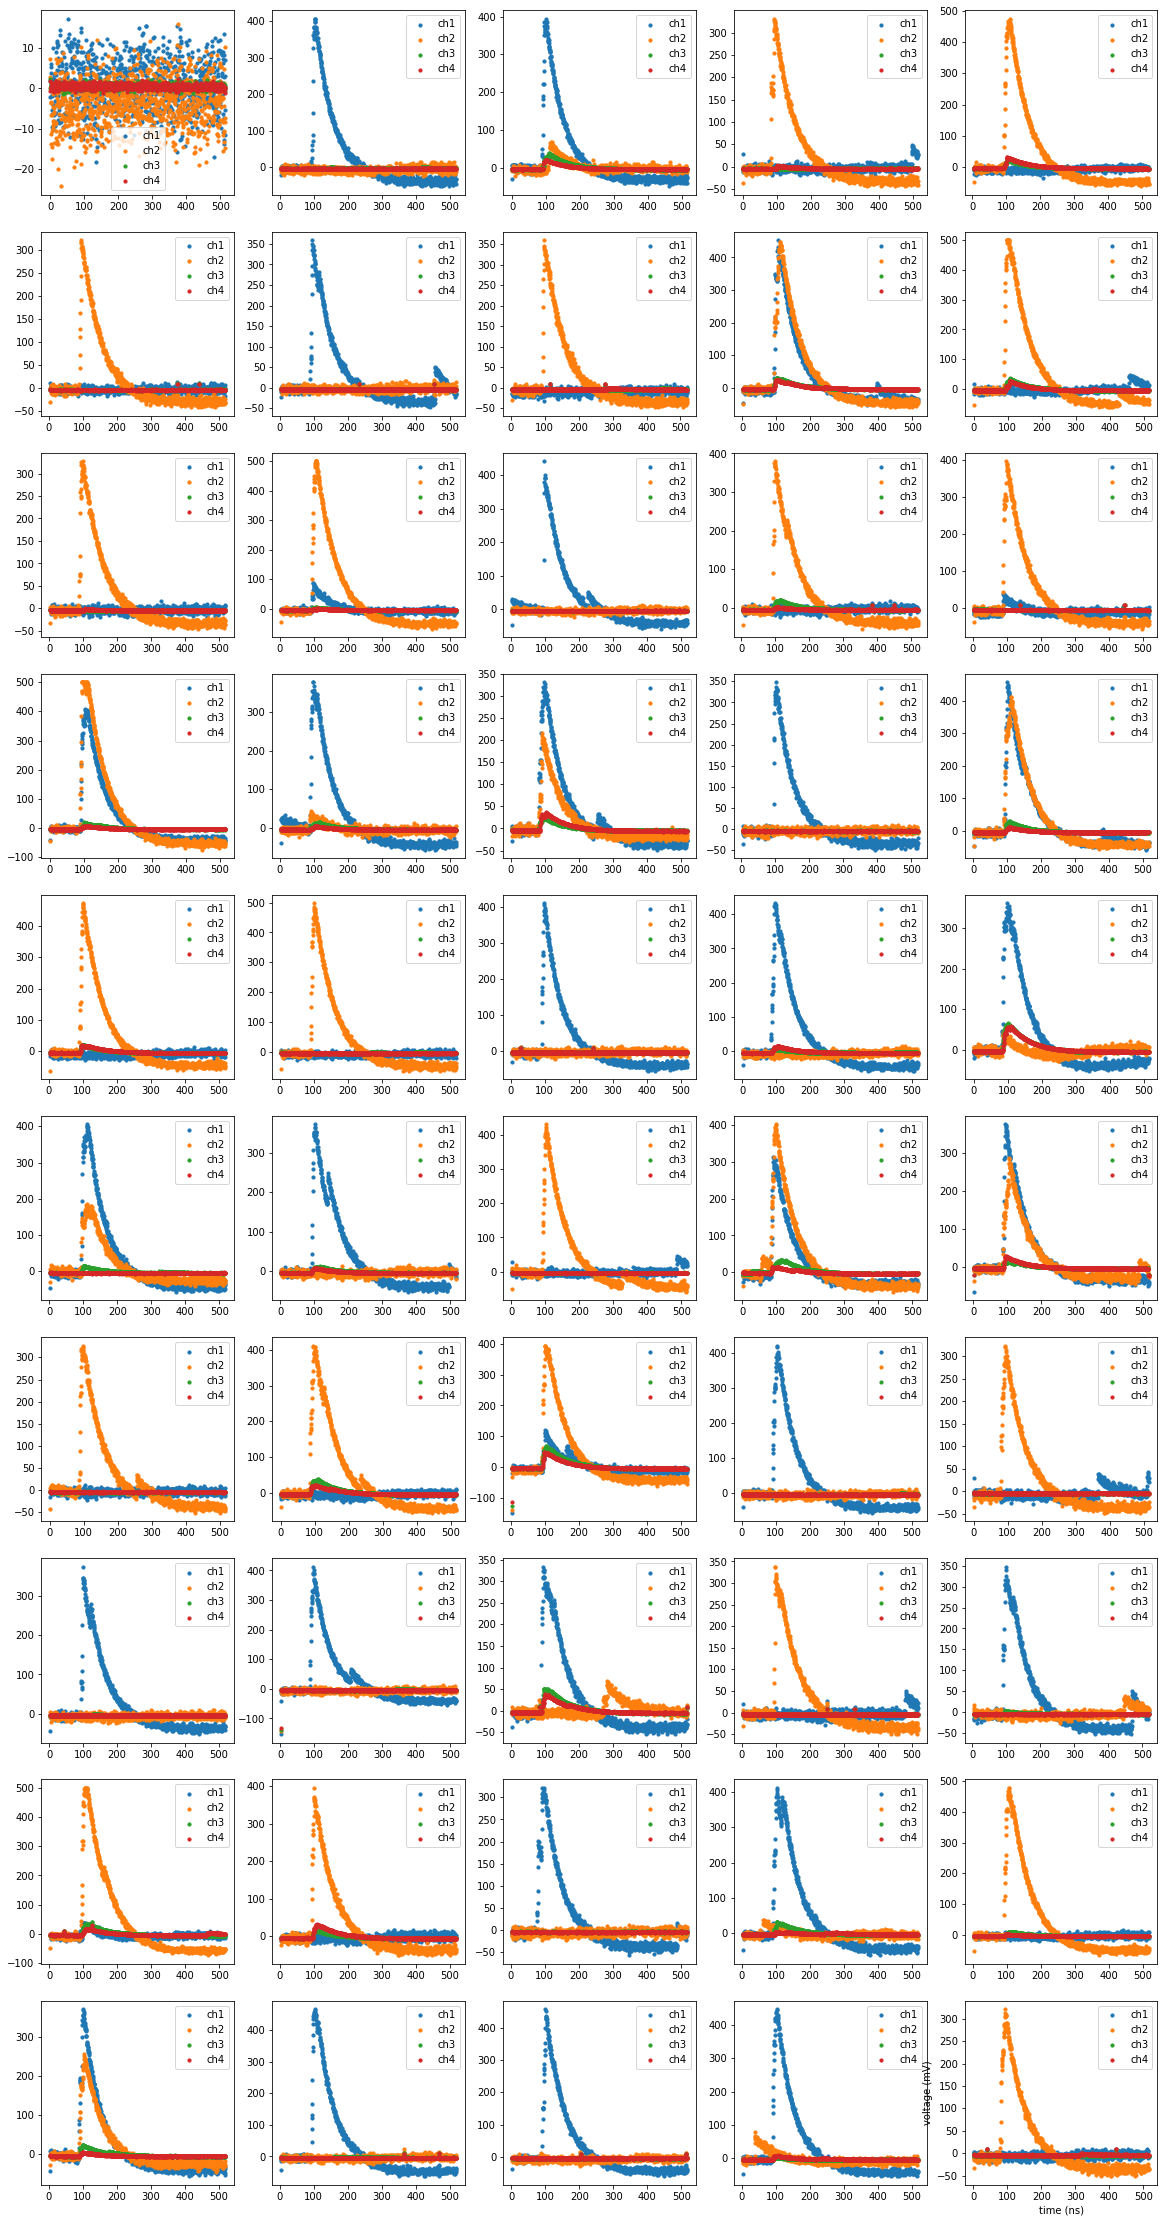

In [57]:
fix,ax = plt.subplots(10,5,figsize=(20,40))
with open("./TwofoldTrigger/5.txt") as f:
    events = f.read().split('-- Event')

for event in range(1,min(51,len(events))):
    lines = events[event].split('\n')
    time = []
    voltage1 = []
    voltage2 = []
    voltage3 = []
    voltage4 = []
#6 - 1028
    for line in lines[4:1028]:
        
        values = line.split()
        if 1: #float(values[5]) > -10:
            time.append(float(values[2]))
            voltage1.append(float(values[3]))
            voltage2.append(float(values[4]))
            voltage3.append(float(values[5]))
            voltage4.append(float(values[6]))
    #print(f"Event {event}, in plot {event//6} row, {event%5} collumn")
    ax[(event-1)//5][(event-1)%5].scatter(time,voltage1,s=10,label="ch1")
    ax[(event-1)//5][(event-1)%5].scatter(time,voltage2,s=10,label="ch2")
    ax[(event-1)//5][(event-1)%5].scatter(time,voltage3,s=10,label="ch3")
    ax[(event-1)//5][(event-1)%5].scatter(time,voltage4,s=10,label="ch4")
    ax[(event-1)//5][(event-1)%5].legend()
    #ax[(event-1)//5][(event-1)%5].set_ylim(-50,50)
plt.xlabel('time (ns)')
plt.ylabel('voltage (mV)')
plt.show()

In [27]:
for n in range(1,5):
    print(n)

1
2
3
4


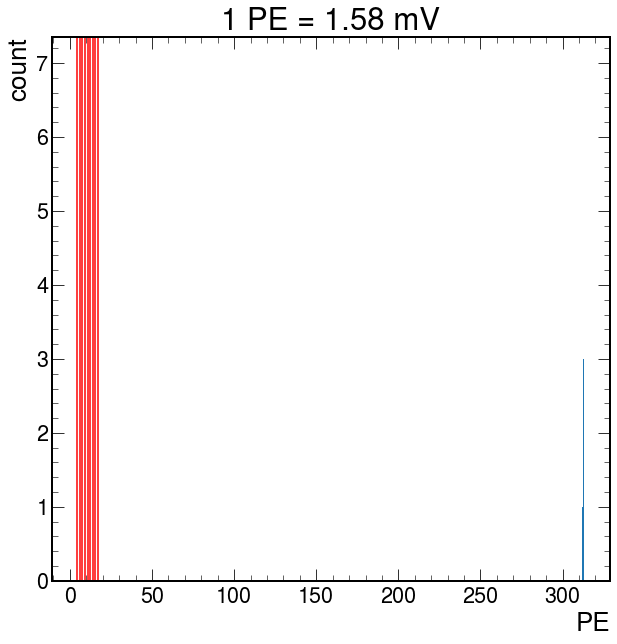

In [10]:
from matplotlib import colors
import mplhep as hep
hep.style.use(hep.style.CMS)
#hep.set_style("CMS")


with open("Jun28Scan1.txt") as f:
          points = f.read().split('Point')
#264
point = points[62]
#print(point)
peaktopeak = []
p2ps = point.split('\n')
for p2p in p2ps:
    try:
        if float(p2p) > 0 and float(p2p) < 495:
            peaktopeak.append(float(p2p)/1.58)
    except ValueError:
        x=1
plt.hist(peaktopeak,100,range=(min(peaktopeak),max(peaktopeak)))


for i in range(9):
    plt.axvline((i*1.58)+4.5,color='red')
plt.title('1 PE = 1.58 mV')
plt.xlabel('PE')
plt.ylabel('count')
plt.show()

[60.66482138  3.1592815   0.73988357]
[ 22.93306182 315.47064976   1.26042049]


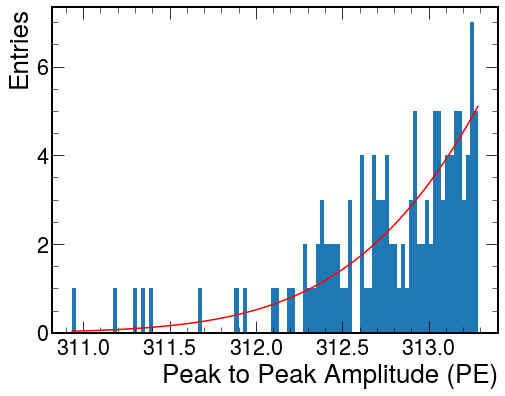

In [11]:
from scipy.optimize import curve_fit
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 
fig = plt.figure( figsize=(8, 6), facecolor='w')
hist_data, bins, patches = plt.hist(peaktopeak, 100, range=[min(peaktopeak), max(peaktopeak)])
x = np.linspace(min(peaktopeak), max(peaktopeak), 100)
y = hist_data
popt, pcov = curve_fit(gaussian, x, y, p0=(60, sum(peaktopeak)/len(peaktopeak), 50))
y = gaussian(x, *popt)
plt.plot(x, y, color='r')
plt.xlabel('Peak to Peak Amplitude (PE)')
plt.ylabel('Entries')
perr = np.sqrt(np.diag(pcov))
print(perr)
print(popt)
#plt.errorbar(x,y,yerr=np.sqrt(y))